# <center>Outpatient and Ambulatory Surgery Consumer Assessment of Healthcare Providers and Systems</center>

### <center>A Data Science Blog Project</center>

#### <center>By: Rachel Bieron </center>

In [93]:
# Setting up environment with imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
# Import survey results to dataframe 'results_df'

results_df = pd.read_csv("ASCQR_OAS_CAHPS_BY_ASC.csv")

In [95]:
# list the fields of the dataframe

print(list(results_df))

['Facility ID', 'Facility Name', 'Address', 'City/Town', 'State', 'ZIP Code', 'County/Parish', 'Telephone Number', 'Patients who reported that staff definitely gave care in a professional way and the facility was clean', 'Patients who reported that staff somewhat gave care in a professional way or the facility was somewhat clean', 'Patients who reported that staff did not give care in a professional way or the facility was not clean', 'Facilities and staff linear mean score', 'Patients who reported that staff definitely communicated about what to expect during and after the procedure', 'Patients who reported that staff somewhat communicated about what to expect during and after the procedure', 'Patients who reported that staff did not communicate about what to expect during and after the procedure', 'Communication about your procedure linear mean score', 'Patients who gave the facility a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)', 'Patients who gave the facility a ra

In [96]:
# Describe the shape of the dataframe

results_df.shape

(710, 30)

In [97]:
# Find out more about the fields including data types

results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710 entries, 0 to 709
Data columns (total 30 columns):
 #   Column                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                        --------------  -----  
 0   Facility ID                                                                                                   710 non-null    object 
 1   Facility Name                                                                                                 710 non-null    object 
 2   Address                                                                                                       710 non-null    object 
 3   City/Town                                                                                                     710 non-null    object 
 4   State                                                   

In [98]:
# Drop fields that we won't consider in our analysis

results_df = results_df.drop(['Footnote','Start Date','End Date','Facility ID','Facility Name','Address','City/Town','State','ZIP Code',
                              'County/Parish','Telephone Number'], axis = 1)

results_df = results_df.drop(["Patients recommending the facility linear mean score", "Patients' rating of the facility linear mean score",
                              "Facilities and staff linear mean score", "Communication about your procedure linear mean score","Number of Sampled Patients",
                              "Number of Completed Surveys", "Survey Response Rate Percent" ], axis = 1)

In [99]:
# Get an overview of the dataset

results_df.head()

,Patients who reported that staff definitely gave care in a professional way and the facility was clean,Patients who reported that staff somewhat gave care in a professional way or the facility was somewhat clean,Patients who reported that staff did not give care in a professional way or the facility was not clean,Patients who reported that staff definitely communicated about what to expect during and after the procedure,Patients who reported that staff somewhat communicated about what to expect during and after the procedure,Patients who reported that staff did not communicate about what to expect during and after the procedure,Patients who gave the facility a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest),Patients who gave the facility a rating of 7 or 8 on a scale from 0 (lowest) to 10 (highest),Patients who gave the facility a rating of 0 to 6 on a scale from 0 (lowest) to 10 (highest),Patients who reported YES they would DEFINITELY recommend the facility to family or friends,Patients who reported PROBABLY YES they would recommend the facility to family or friends,"Patients who reported NO, they would not recommend the facility to family or friends"
0,97.0,2.0,1.0,95.0,4.0,1.0,92.0,7.0,1.0,90.0,9.0,1.0
1,96.0,3.0,1.0,92.0,6.0,2.0,89.0,8.0,3.0,88.0,11.0,1.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,96.0,4.0,0.0,91.0,8.0,1.0,89.0,10.0,1.0,82.0,17.0,1.0
4,97.0,3.0,0.0,92.0,6.0,2.0,88.0,10.0,2.0,87.0,12.0,1.0


In [100]:
# Check for null values

results_df.isna().sum()

Patients who reported that staff definitely gave care in a professional way and the facility was clean          211
Patients who reported that staff somewhat gave care in a professional way or the facility was somewhat clean    211
Patients who reported that staff did not give care in a professional way or the facility was not clean          211
Patients who reported that staff definitely communicated about what to expect during and after the procedure    211
Patients who reported that staff somewhat communicated about what to expect during and after the procedure      211
Patients who reported that staff did not communicate about what to expect during and after the procedure        211
Patients who gave the facility a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)                   211
Patients who gave the facility a rating of 7 or 8 on a scale from 0 (lowest) to 10 (highest)                    211
Patients who gave the facility a rating of 0 to 6 on a scale from 0 (low

In [101]:
# Replace null values with mean data

# Get numeric columns
num_cols = results_df.select_dtypes(include=['float', 'int']).columns

# Replace nulls
results_df[num_cols] = results_df[num_cols].fillna(results_df[num_cols].mean())

In [102]:
# Verify null values are have been replaced

results_df.isna().sum()

Patients who reported that staff definitely gave care in a professional way and the facility was clean          0
Patients who reported that staff somewhat gave care in a professional way or the facility was somewhat clean    0
Patients who reported that staff did not give care in a professional way or the facility was not clean          0
Patients who reported that staff definitely communicated about what to expect during and after the procedure    0
Patients who reported that staff somewhat communicated about what to expect during and after the procedure      0
Patients who reported that staff did not communicate about what to expect during and after the procedure        0
Patients who gave the facility a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)                   0
Patients who gave the facility a rating of 7 or 8 on a scale from 0 (lowest) to 10 (highest)                    0
Patients who gave the facility a rating of 0 to 6 on a scale from 0 (lowest) to 10 (high

In [103]:
# Describe the data and look for standardization

results_df.describe()

,Patients who reported that staff definitely gave care in a professional way and the facility was clean,Patients who reported that staff somewhat gave care in a professional way or the facility was somewhat clean,Patients who reported that staff did not give care in a professional way or the facility was not clean,Patients who reported that staff definitely communicated about what to expect during and after the procedure,Patients who reported that staff somewhat communicated about what to expect during and after the procedure,Patients who reported that staff did not communicate about what to expect during and after the procedure,Patients who gave the facility a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest),Patients who gave the facility a rating of 7 or 8 on a scale from 0 (lowest) to 10 (highest),Patients who gave the facility a rating of 0 to 6 on a scale from 0 (lowest) to 10 (highest),Patients who reported YES they would DEFINITELY recommend the facility to family or friends,Patients who reported PROBABLY YES they would recommend the facility to family or friends,"Patients who reported NO, they would not recommend the facility to family or friends"
count,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000
mean,97.278557,2.450902,0.270541,91.911824,6.565130,1.523046,89.382766,8.763527,1.853707,86.983968,11.176353,1.839679
std,1.107915,0.885192,0.398298,1.918700,1.550574,0.617659,3.370806,2.701955,1.063778,4.003150,3.456863,1.055026
min,92.000000,0.000000,0.000000,84.000000,2.000000,0.000000,74.000000,1.000000,0.000000,61.000000,3.000000,0.000000
25%,97.000000,2.000000,0.000000,91.000000,6.000000,1.000000,89.000000,7.000000,1.000000,86.000000,9.000000,1.000000
50%,97.278557,2.450902,0.000000,91.911824,6.565130,1.523046,89.382766,8.763527,1.853707,86.983968,11.176353,1.839679
75%,98.000000,3.000000,0.270541,93.000000,7.000000,2.000000,91.000000,10.000000,2.000000,89.000000,12.000000,2.000000
max,100.000000,6.000000,3.000000,98.000000,12.000000,5.000000,99.000000,22.000000,9.000000,97.000000,33.000000,8.000000


In [104]:
# Check the mean of the data

results_df.mean()

Patients who reported that staff definitely gave care in a professional way and the facility was clean          97.278557
Patients who reported that staff somewhat gave care in a professional way or the facility was somewhat clean     2.450902
Patients who reported that staff did not give care in a professional way or the facility was not clean           0.270541
Patients who reported that staff definitely communicated about what to expect during and after the procedure    91.911824
Patients who reported that staff somewhat communicated about what to expect during and after the procedure       6.565130
Patients who reported that staff did not communicate about what to expect during and after the procedure         1.523046
Patients who gave the facility a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)                   89.382766
Patients who gave the facility a rating of 7 or 8 on a scale from 0 (lowest) to 10 (highest)                     8.763527
Patients who gave the fa

In [105]:
# Confirm data is not yet standardized

results_df.std()

Patients who reported that staff definitely gave care in a professional way and the facility was clean          1.107915
Patients who reported that staff somewhat gave care in a professional way or the facility was somewhat clean    0.885192
Patients who reported that staff did not give care in a professional way or the facility was not clean          0.398298
Patients who reported that staff definitely communicated about what to expect during and after the procedure    1.918700
Patients who reported that staff somewhat communicated about what to expect during and after the procedure      1.550574
Patients who reported that staff did not communicate about what to expect during and after the procedure        0.617659
Patients who gave the facility a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)                   3.370806
Patients who gave the facility a rating of 7 or 8 on a scale from 0 (lowest) to 10 (highest)                    2.701955
Patients who gave the facility a

In [106]:
# Standardize data using scikit-learn StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

In [107]:
# Select features to standardize
features_to_standardize = results_df.columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
results_df[features_to_standardize] = scaler.fit_transform(results_df[features_to_standardize])

In [108]:
# Describe standarized data

results_df.describe()

,Patients who reported that staff definitely gave care in a professional way and the facility was clean,Patients who reported that staff somewhat gave care in a professional way or the facility was somewhat clean,Patients who reported that staff did not give care in a professional way or the facility was not clean,Patients who reported that staff definitely communicated about what to expect during and after the procedure,Patients who reported that staff somewhat communicated about what to expect during and after the procedure,Patients who reported that staff did not communicate about what to expect during and after the procedure,Patients who gave the facility a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest),Patients who gave the facility a rating of 7 or 8 on a scale from 0 (lowest) to 10 (highest),Patients who gave the facility a rating of 0 to 6 on a scale from 0 (lowest) to 10 (highest),Patients who reported YES they would DEFINITELY recommend the facility to family or friends,Patients who reported PROBABLY YES they would recommend the facility to family or friends,"Patients who reported NO, they would not recommend the facility to family or friends"
count,7.100000e+02,7.100000e+02,7.100000e+02,7.100000e+02,7.100000e+02,7.100000e+02,7.100000e+02,7.100000e+02,7.100000e+02,7.100000e+02,7.100000e+02,7.100000e+02
mean,-3.497672e-15,-7.505733e-17,4.003058e-17,2.461880e-15,7.005351e-17,-3.002293e-16,5.163944e-15,6.655083e-16,1.000764e-17,-4.803669e-16,-3.902981e-16,1.401070e-16
std,1.000705e+00,1.000705e+00,1.000705e+00,1.000705e+00,1.000705e+00,1.000705e+00,1.000705e+00,1.000705e+00,1.000705e+00,1.000705e+00,1.000705e+00,1.000705e+00
min,-4.767764e+00,-2.770733e+00,-6.797209e-01,-4.126440e+00,-2.946232e+00,-2.467577e+00,-4.566745e+00,-2.875326e+00,-1.743799e+00,-6.495457e+00,-2.366920e+00,-1.744957e+00
25%,-2.516018e-01,-5.097423e-01,-6.797209e-01,-4.755649e-01,-3.647222e-01,-8.474178e-01,-1.136332e-01,-6.531458e-01,-8.030900e-01,-2.459717e-01,-6.300183e-01,-7.964457e-01
50%,0.000000e+00,0.000000e+00,-6.797209e-01,0.000000e+00,0.000000e+00,-3.597475e-16,4.218835e-15,6.578975e-16,0.000000e+00,0.000000e+00,-5.142261e-16,2.106119e-16
75%,6.516306e-01,6.207529e-01,0.000000e+00,5.675423e-01,2.806551e-01,7.727411e-01,4.801151e-01,4.579443e-01,1.376187e-01,5.039665e-01,2.384323e-01,1.520660e-01
max,2.458096e+00,4.012239e+00,6.857629e+00,3.175310e+00,3.507542e+00,5.633218e+00,2.855108e+00,4.902304e+00,6.722580e+00,2.503802e+00,6.317587e+00,5.843136e+00


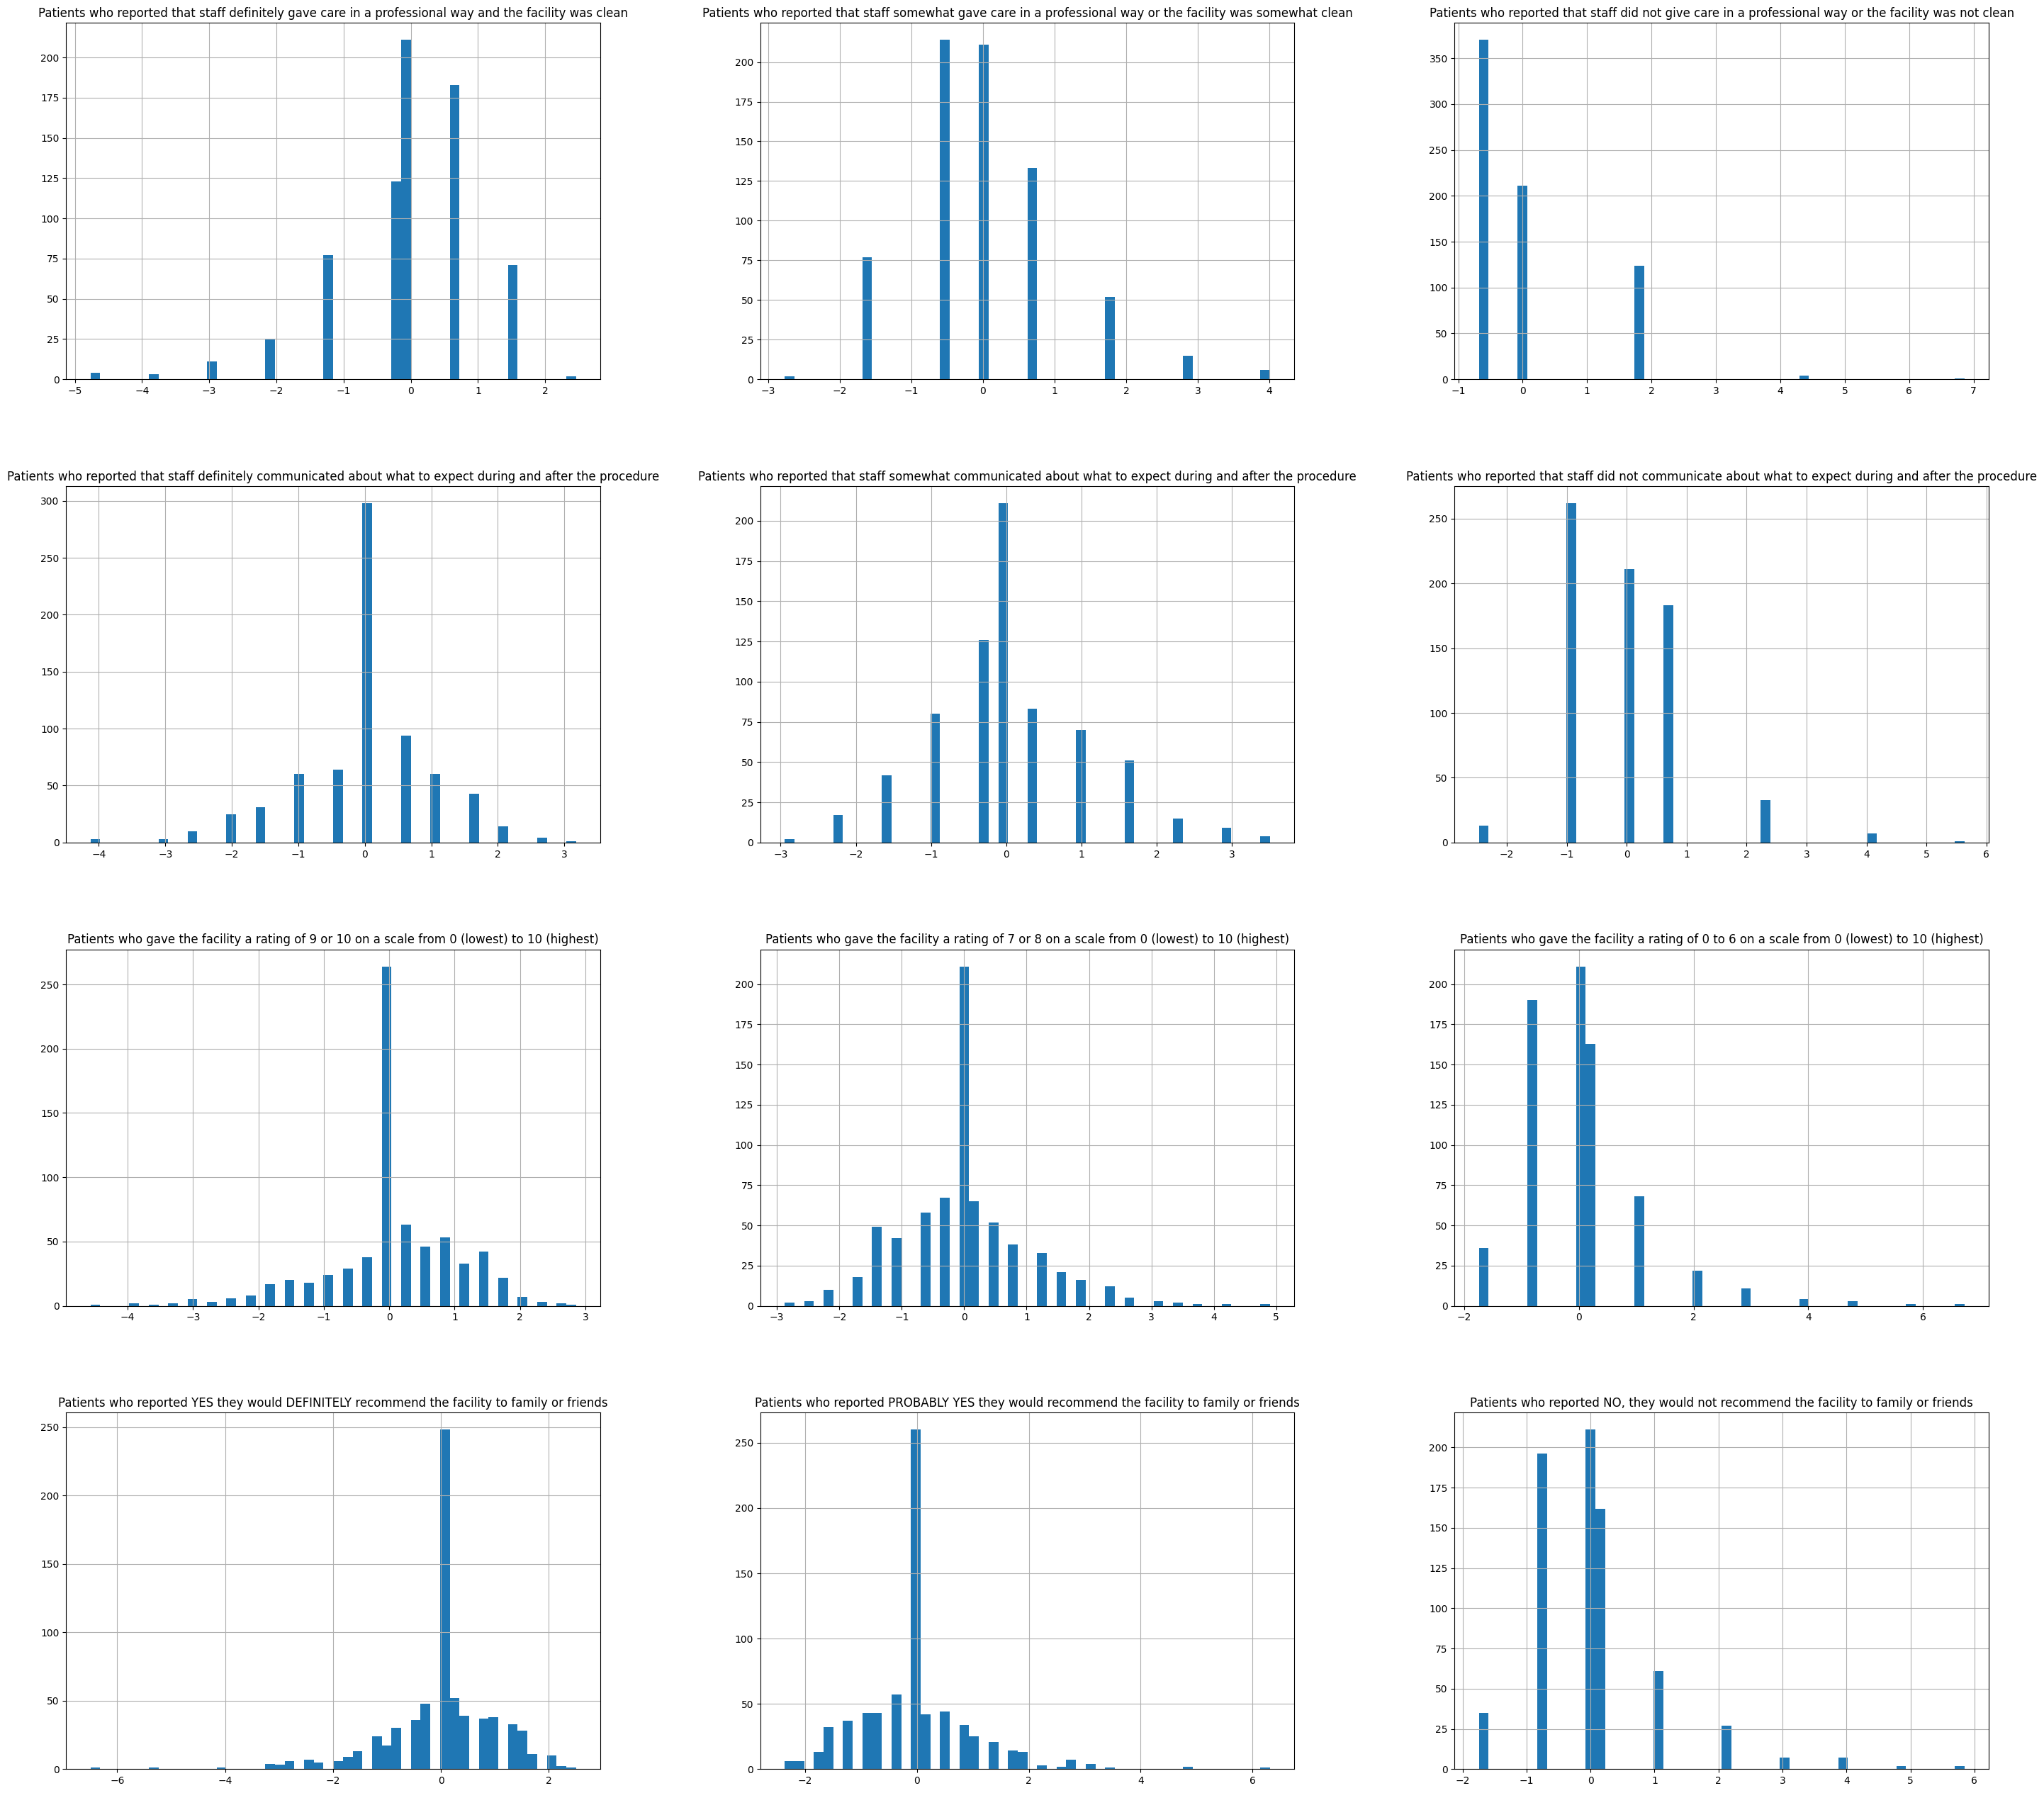

In [109]:
# Plot histograms of the features with matplotlib to see their distributions

results_df.hist(bins=50, figsize=(35, 32))
plt.show()

In [110]:
# Calculate the correlation matrix of the features

corr_matrix = results_df.corr()

## Patients who reported YES they would DEFINITELY recommend the facility to family or friends

In [111]:
# Find the correlation metrics to determine the most important features when recommending a facility

corr_matrix['Patients who reported YES they would DEFINITELY recommend the facility to family or friends'].sort_values(ascending=False)

Patients who reported YES they would DEFINITELY recommend the facility to family or friends                     1.000000
Patients who gave the facility a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)                   0.845401
Patients who reported that staff definitely gave care in a professional way and the facility was clean          0.695568
Patients who reported that staff definitely communicated about what to expect during and after the procedure    0.565269
Patients who reported that staff did not communicate about what to expect during and after the procedure       -0.364401
Patients who reported that staff did not give care in a professional way or the facility was not clean         -0.465150
Patients who reported that staff somewhat communicated about what to expect during and after the procedure     -0.554315
Patients who reported NO, they would not recommend the facility to family or friends                           -0.614238
Patients who reported that staff

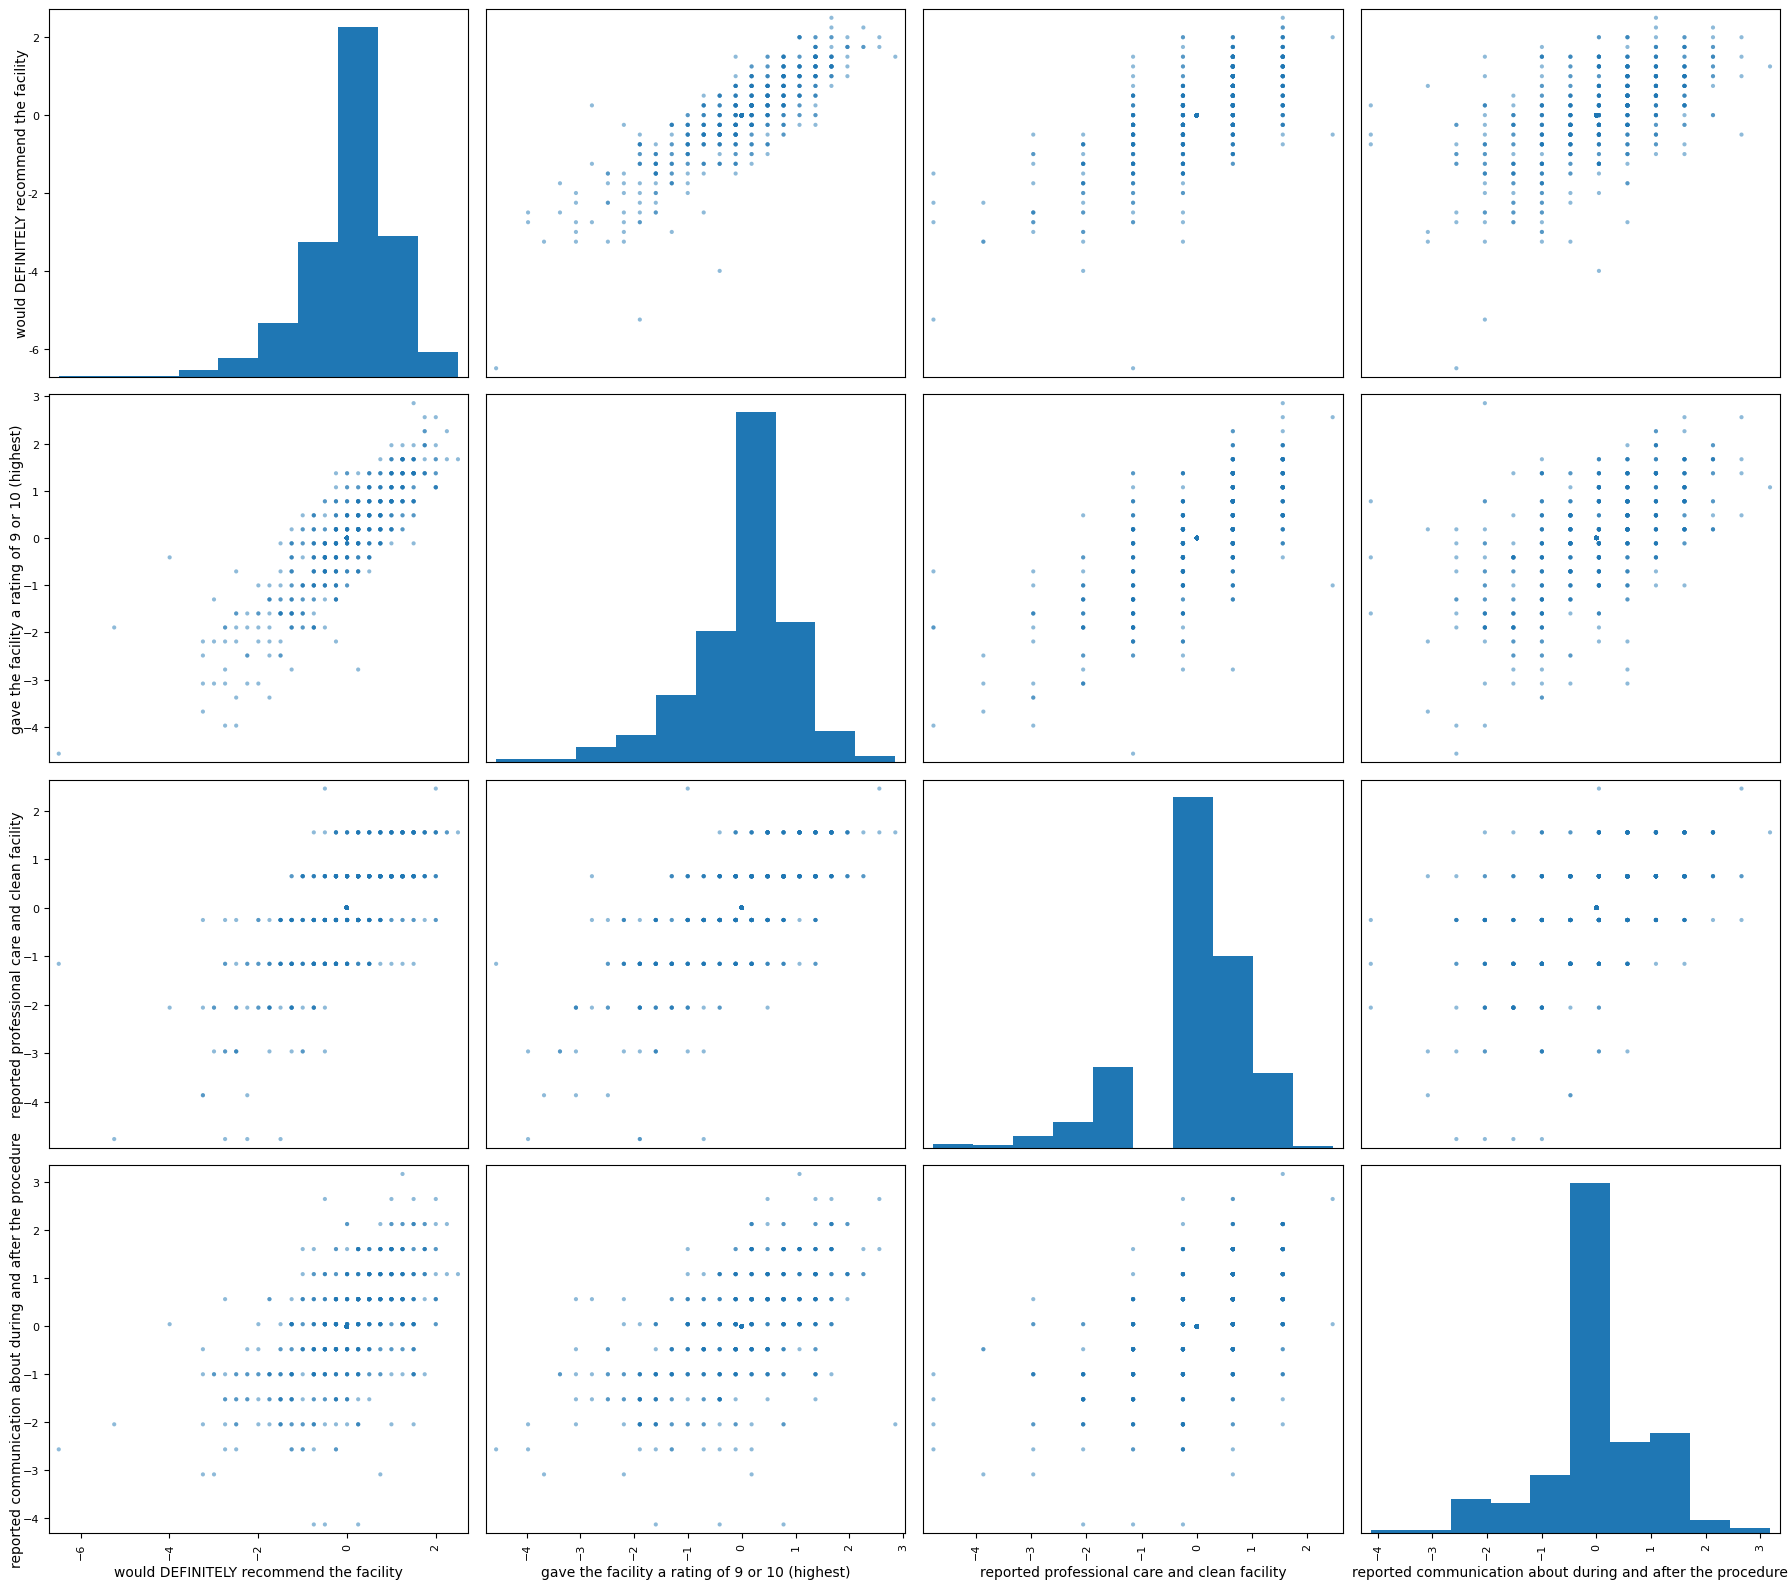

In [112]:
# Plot the most important feature pairs with a scatter plot

# List important features
features = ["Patients who reported YES they would DEFINITELY recommend the facility to family or friends", 
            "Patients who gave the facility a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)",
            "Patients who reported that staff definitely gave care in a professional way and the facility was clean",
            "Patients who reported that staff definitely communicated about what to expect during and after the procedure"
           ]
    


# Abbreviate features for readability
df_matrix_features = results_df[features].rename(columns={"Patients who reported YES they would DEFINITELY recommend the facility to family or friends":"would DEFINITELY recommend the facility",
                                                  "Patients who gave the facility a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)":"gave the facility a rating of 9 or 10 (highest)",
                                                  "Patients who reported that staff definitely gave care in a professional way and the facility was clean":"reported professional care and clean facility",
                                                  "Patients who reported that staff definitely communicated about what to expect during and after the procedure":"reported communication about during and after the procedure" 
                                                 }
                                        )
# Create scatter plot
scatter_matrix_plot= scatter_matrix(df_matrix_features, figsize=(18, 16))

# Adjust how axis labels are displayed
for ax in scatter_matrix_plot.ravel():
    if ax.get_xlabel():
        ax.set_xlabel(ax.get_xlabel(), rotation=0, ha='center', wrap=True)
    if ax.get_ylabel():
        ax.set_ylabel(ax.get_ylabel(), rotation=90, va='center', wrap=True)
        
plt.tight_layout()
plt.show()

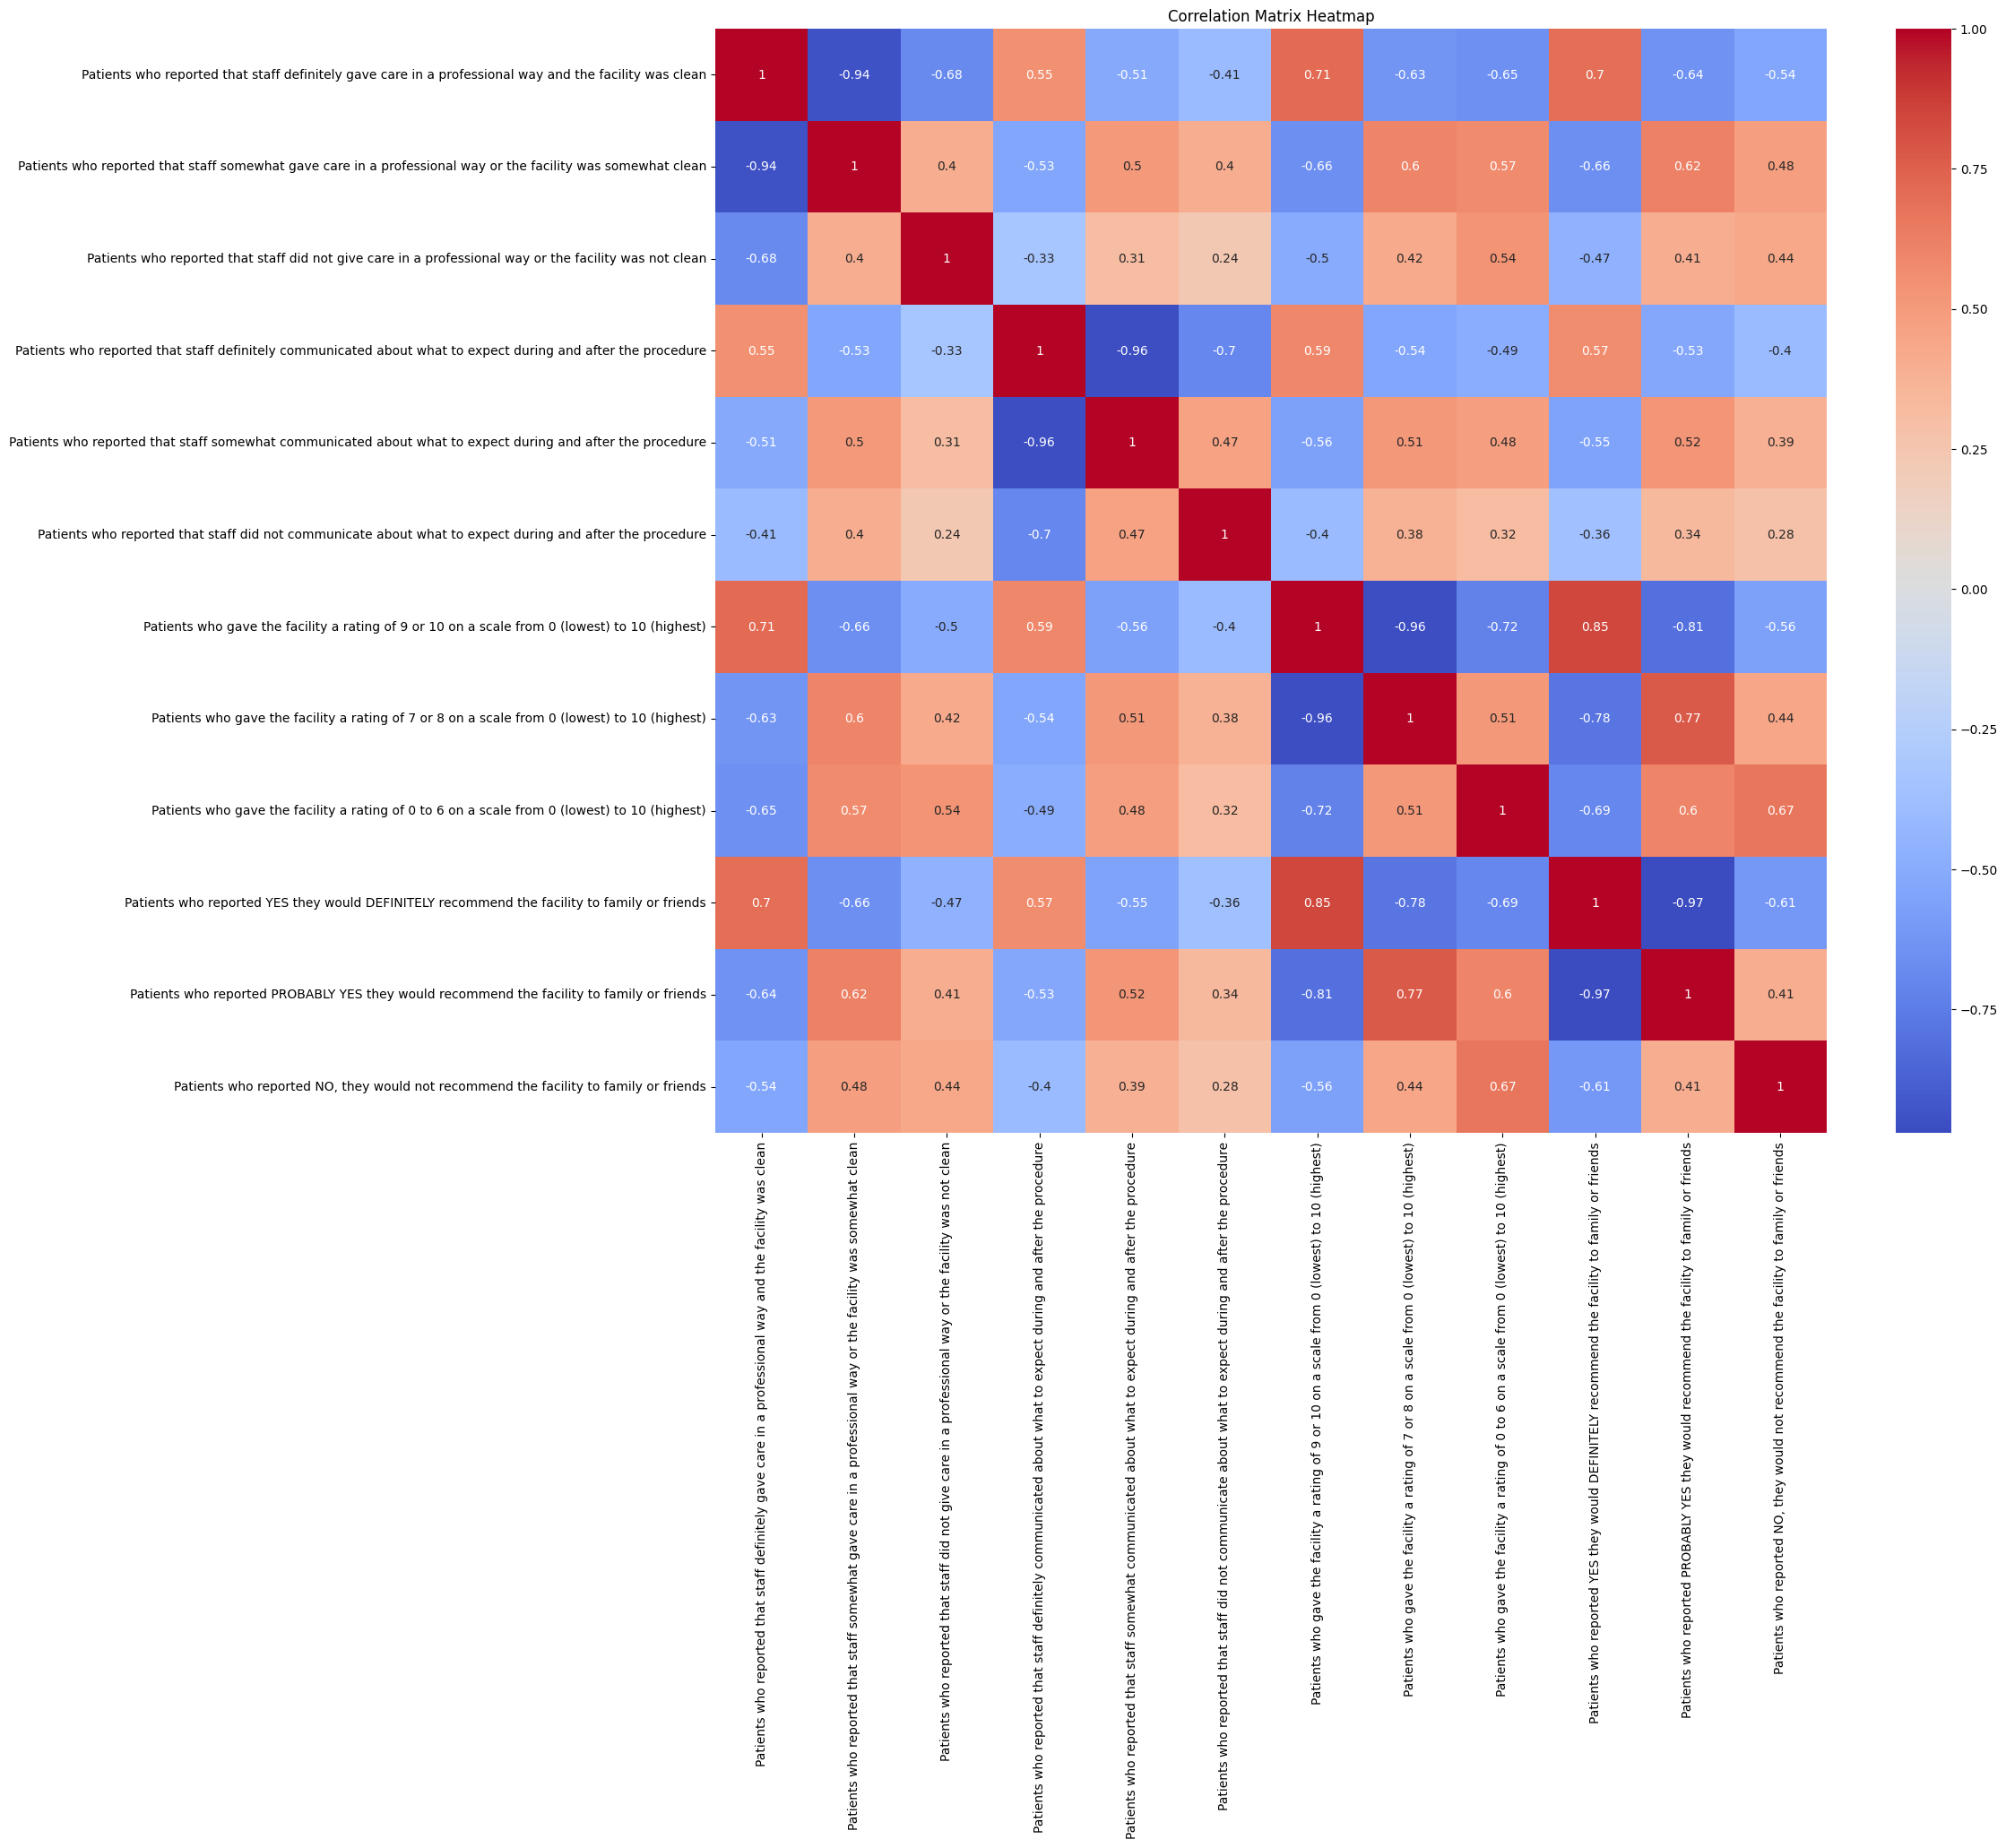

In [113]:
# Plot a heatmap of the correlation matrix using seaborn 

plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

## Train and Evaluate a Model

In [114]:
# Split the data into features and labels
X = results_df.drop("Patients who reported YES they would DEFINITELY recommend the facility to family or friends", axis=1)
y = results_df["Patients who reported YES they would DEFINITELY recommend the facility to family or friends"]


In [115]:
# Split data with ratio: train: 0.8 | test: 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [116]:
# Create a linear regression onject to train and score

linear_model = LinearRegression()


In [117]:
# Train a linear regression model on the training set

linear_model.fit(X_train, y_train)

LinearRegression()

In [118]:
# Make predictions on the training set
linear_predictions_train = linear_model.predict(X_train)

# Make predictions on the test set
linear_predictions_test = linear_model.predict(X_test)

print(linear_predictions_test[:12].round(0))

[-1. -1. -0.  1. -0. -1.  0. -0. -0.  0.  1.  1.]


In [119]:
# Compare the predictions with the actual values
print(y_test[:12].values.round(0))

[-1. -1.  0.  1.  0. -1.  0.  0.  0.  0.  1.  1.]


In [120]:
# Calculate the relative error of these predictions

relative_errors = np.abs(linear_predictions_test - y_test) / y_test * 100
print("Relative errors in percent: ", relative_errors[:12].values)

Relative errors in percent:  [-2.82790910e-13 -4.34765195e-13             inf  2.21176418e-13
             inf -1.11478255e-14  2.65985810e-11             inf
             inf  1.47817989e-11  8.85412589e-14  3.52475183e-13]


In [121]:
# Calculate the root mean squared error on the training and test set

# Training RMSE
rmse_train = root_mean_squared_error(y_train, linear_predictions_train)
print(f"Training RMSE: {rmse_train}")

# Testing RMSE
rmse_test = root_mean_squared_error(y_test, linear_predictions_test)
print(f"Testing RMSE: {rmse_test}")

Training RMSE: 1.3918024139118362e-15
Testing RMSE: 1.2422026573959613e-15


In [122]:
# Train a simple linear regression model with only one feature for comparison
X_train_high_rating = X_train[['Patients who gave the facility a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)']]
X_test_high_rating = X_test[['Patients who gave the facility a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)']]
simple_linear_model = LinearRegression()
simple_linear_model.fit(X_train_high_rating, y_train)

LinearRegression()

In [123]:
# Make predictions on the training and test set
simple_predictions_train = simple_linear_model.predict(X_train_high_rating)
simple_predictions_test = simple_linear_model.predict(X_test_high_rating)

In [124]:
# Calculate the root mean squared error on the training and test set
simple_rmse_train = root_mean_squared_error(y_train, simple_predictions_train)
print(f"Training Simple RMSE: {simple_rmse_train}")

simple_rmse_test = root_mean_squared_error(y_test, simple_predictions_test)
print(f"Testing Simple RMSE: {simple_rmse_test}")

Training Simple RMSE: 0.5593673511849193
Testing Simple RMSE: 0.41879342936372277


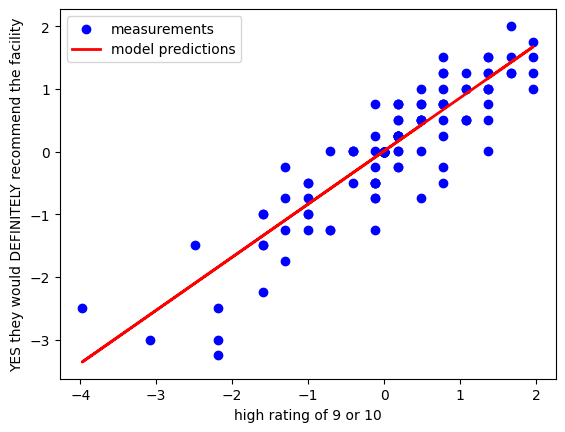

In [125]:
# Plot the simple linear regression model
plt.scatter(X_test_high_rating, y_test, color='blue', label='measurements')
plt.plot(X_test_high_rating, simple_predictions_test, color='red', linewidth=2, label='model predictions')
plt.xlabel("high rating of 9 or 10")
plt.ylabel("YES they would DEFINITELY recommend the facility")
plt.legend(loc="upper left")
plt.show()

## Patients who reported NO, they would not recommend the facility to family or friends

In [126]:
# Find the correlation metrics to determine the most important features when not recommending a facility

corr_matrix['Patients who reported NO, they would not recommend the facility to family or friends'].sort_values(ascending=False)

Patients who reported NO, they would not recommend the facility to family or friends                            1.000000
Patients who gave the facility a rating of 0 to 6 on a scale from 0 (lowest) to 10 (highest)                    0.668949
Patients who reported that staff somewhat gave care in a professional way or the facility was somewhat clean    0.477353
Patients who gave the facility a rating of 7 or 8 on a scale from 0 (lowest) to 10 (highest)                    0.439406
Patients who reported that staff did not give care in a professional way or the facility was not clean          0.435143
Patients who reported PROBABLY YES they would recommend the facility to family or friends                       0.406109
Patients who reported that staff somewhat communicated about what to expect during and after the procedure      0.389025
Patients who reported that staff did not communicate about what to expect during and after the procedure        0.278872
Patients who reported that staff

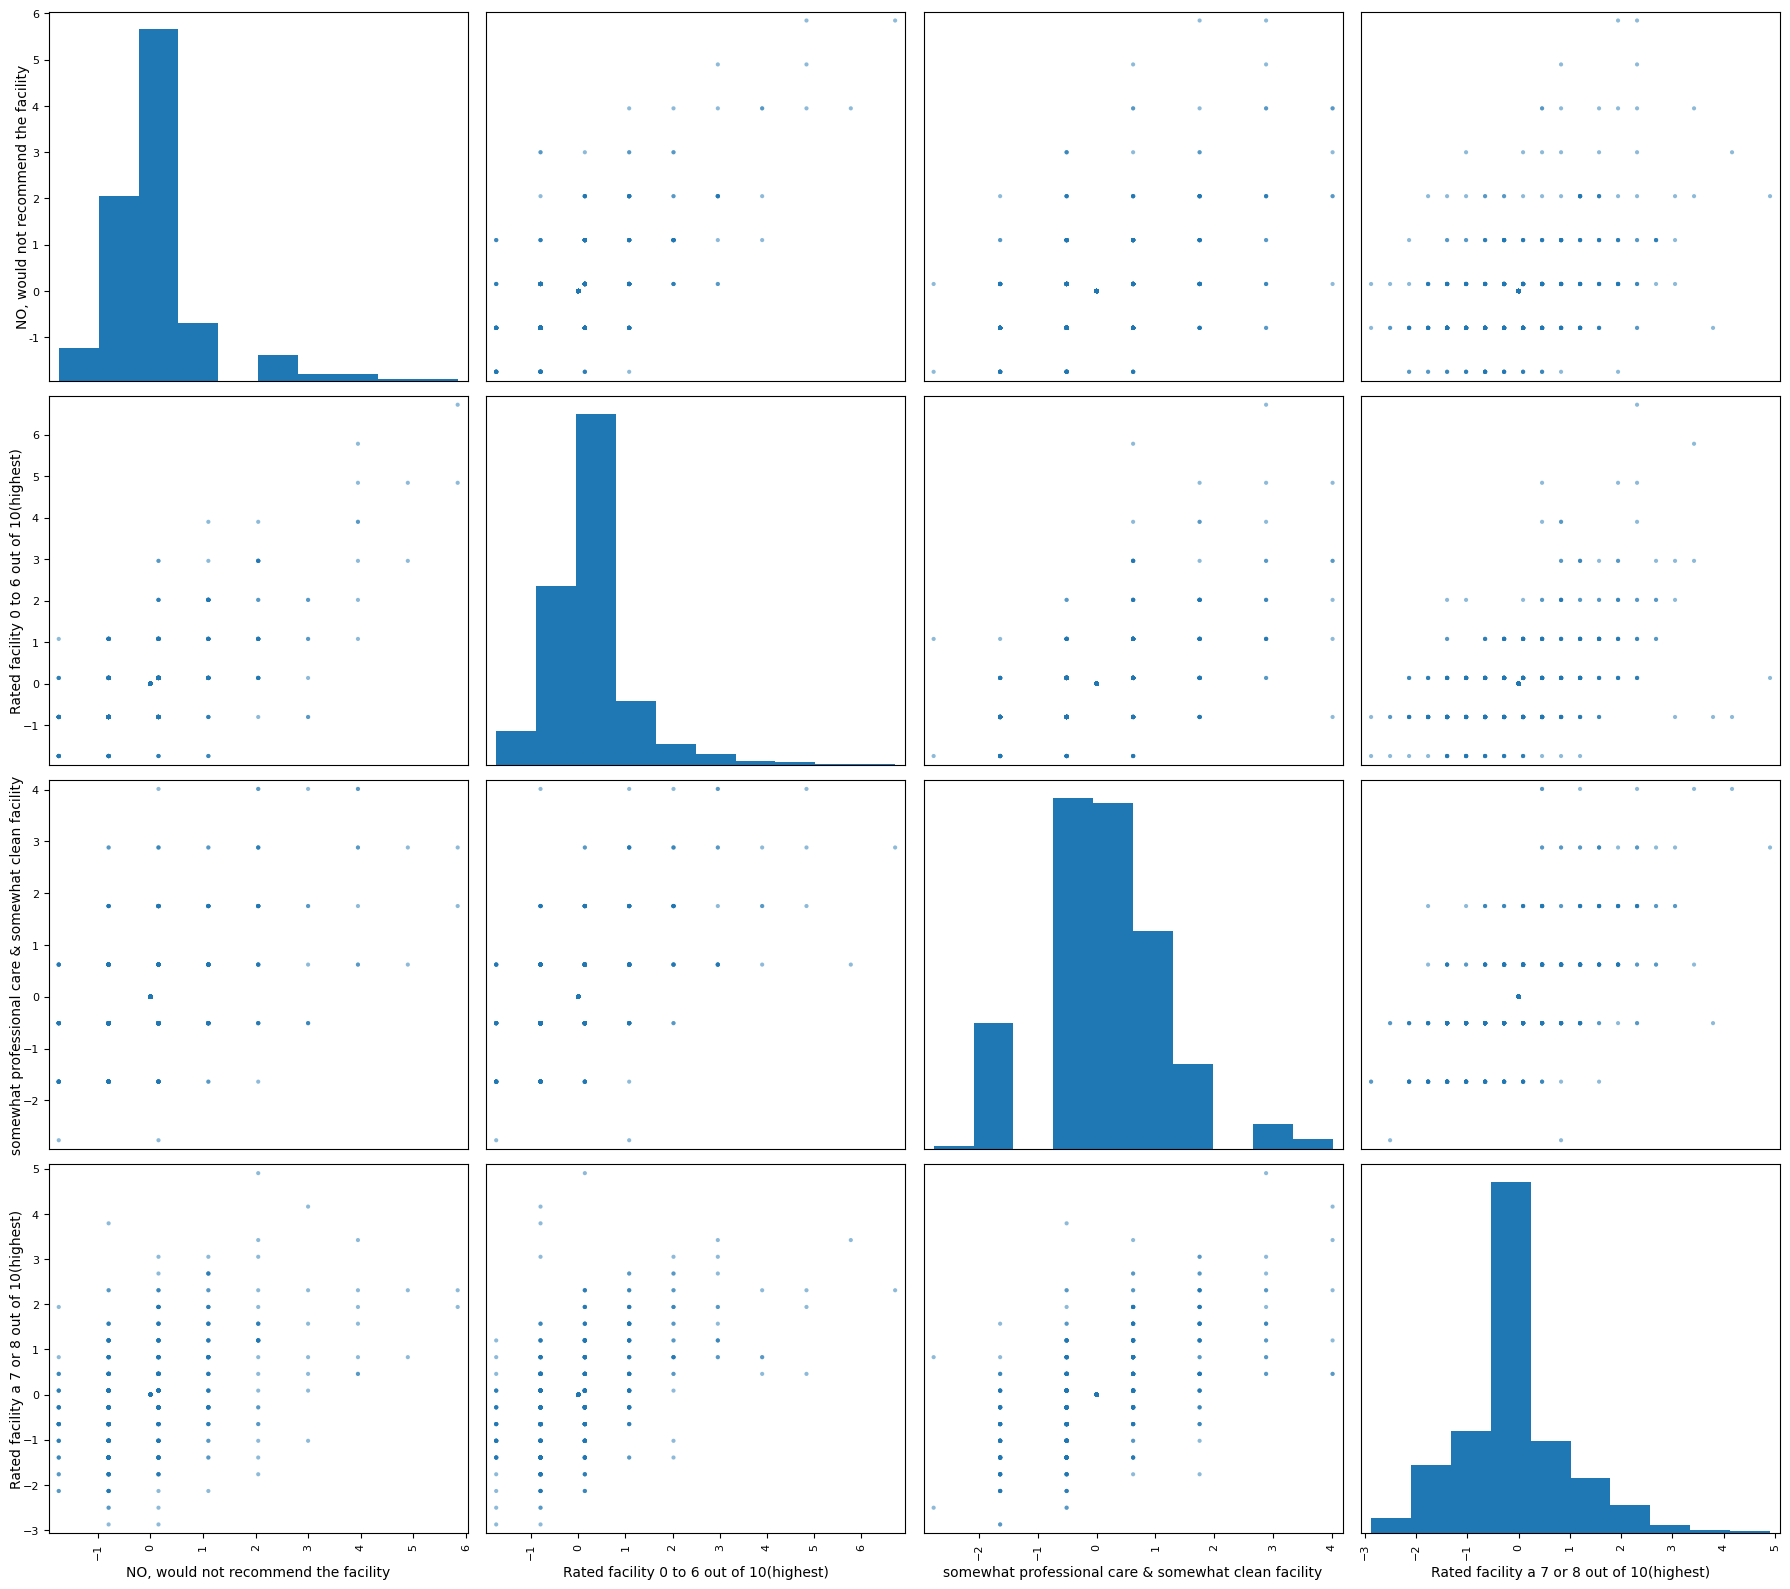

In [127]:
# Plot the most important feature pairs with a scatter plot

# List important features
features2 = ["Patients who reported NO, they would not recommend the facility to family or friends", 
            "Patients who gave the facility a rating of 0 to 6 on a scale from 0 (lowest) to 10 (highest)",
            "Patients who reported that staff somewhat gave care in a professional way or the facility was somewhat clean",
            "Patients who gave the facility a rating of 7 or 8 on a scale from 0 (lowest) to 10 (highest)",
           ]
    
# Abbreviate features for readability
df_matrix_features2 = results_df[features2].rename(columns={"Patients who reported NO, they would not recommend the facility to family or friends":"NO, would not recommend the facility", 
                                                            "Patients who gave the facility a rating of 0 to 6 on a scale from 0 (lowest) to 10 (highest)":"Rated facility 0 to 6 out of 10(highest)",
                                                            "Patients who reported that staff somewhat gave care in a professional way or the facility was somewhat clean":"somewhat professional care & somewhat clean facility",
                                                            "Patients who gave the facility a rating of 7 or 8 on a scale from 0 (lowest) to 10 (highest)":"Rated facility a 7 or 8 out of 10(highest)",
                                                           }
                                                   )

# Create scatter plot
scatter_matrix_plot= scatter_matrix(df_matrix_features2, figsize=(18, 16))

# Adjust how axis labels are displayed
for ax in scatter_matrix_plot.ravel():
    if ax.get_xlabel():
        ax.set_xlabel(ax.get_xlabel(), rotation=0, ha='center', wrap=True)
    if ax.get_ylabel():
        ax.set_ylabel(ax.get_ylabel(), rotation=90, va='center', wrap=True)
        
plt.tight_layout()
plt.show()

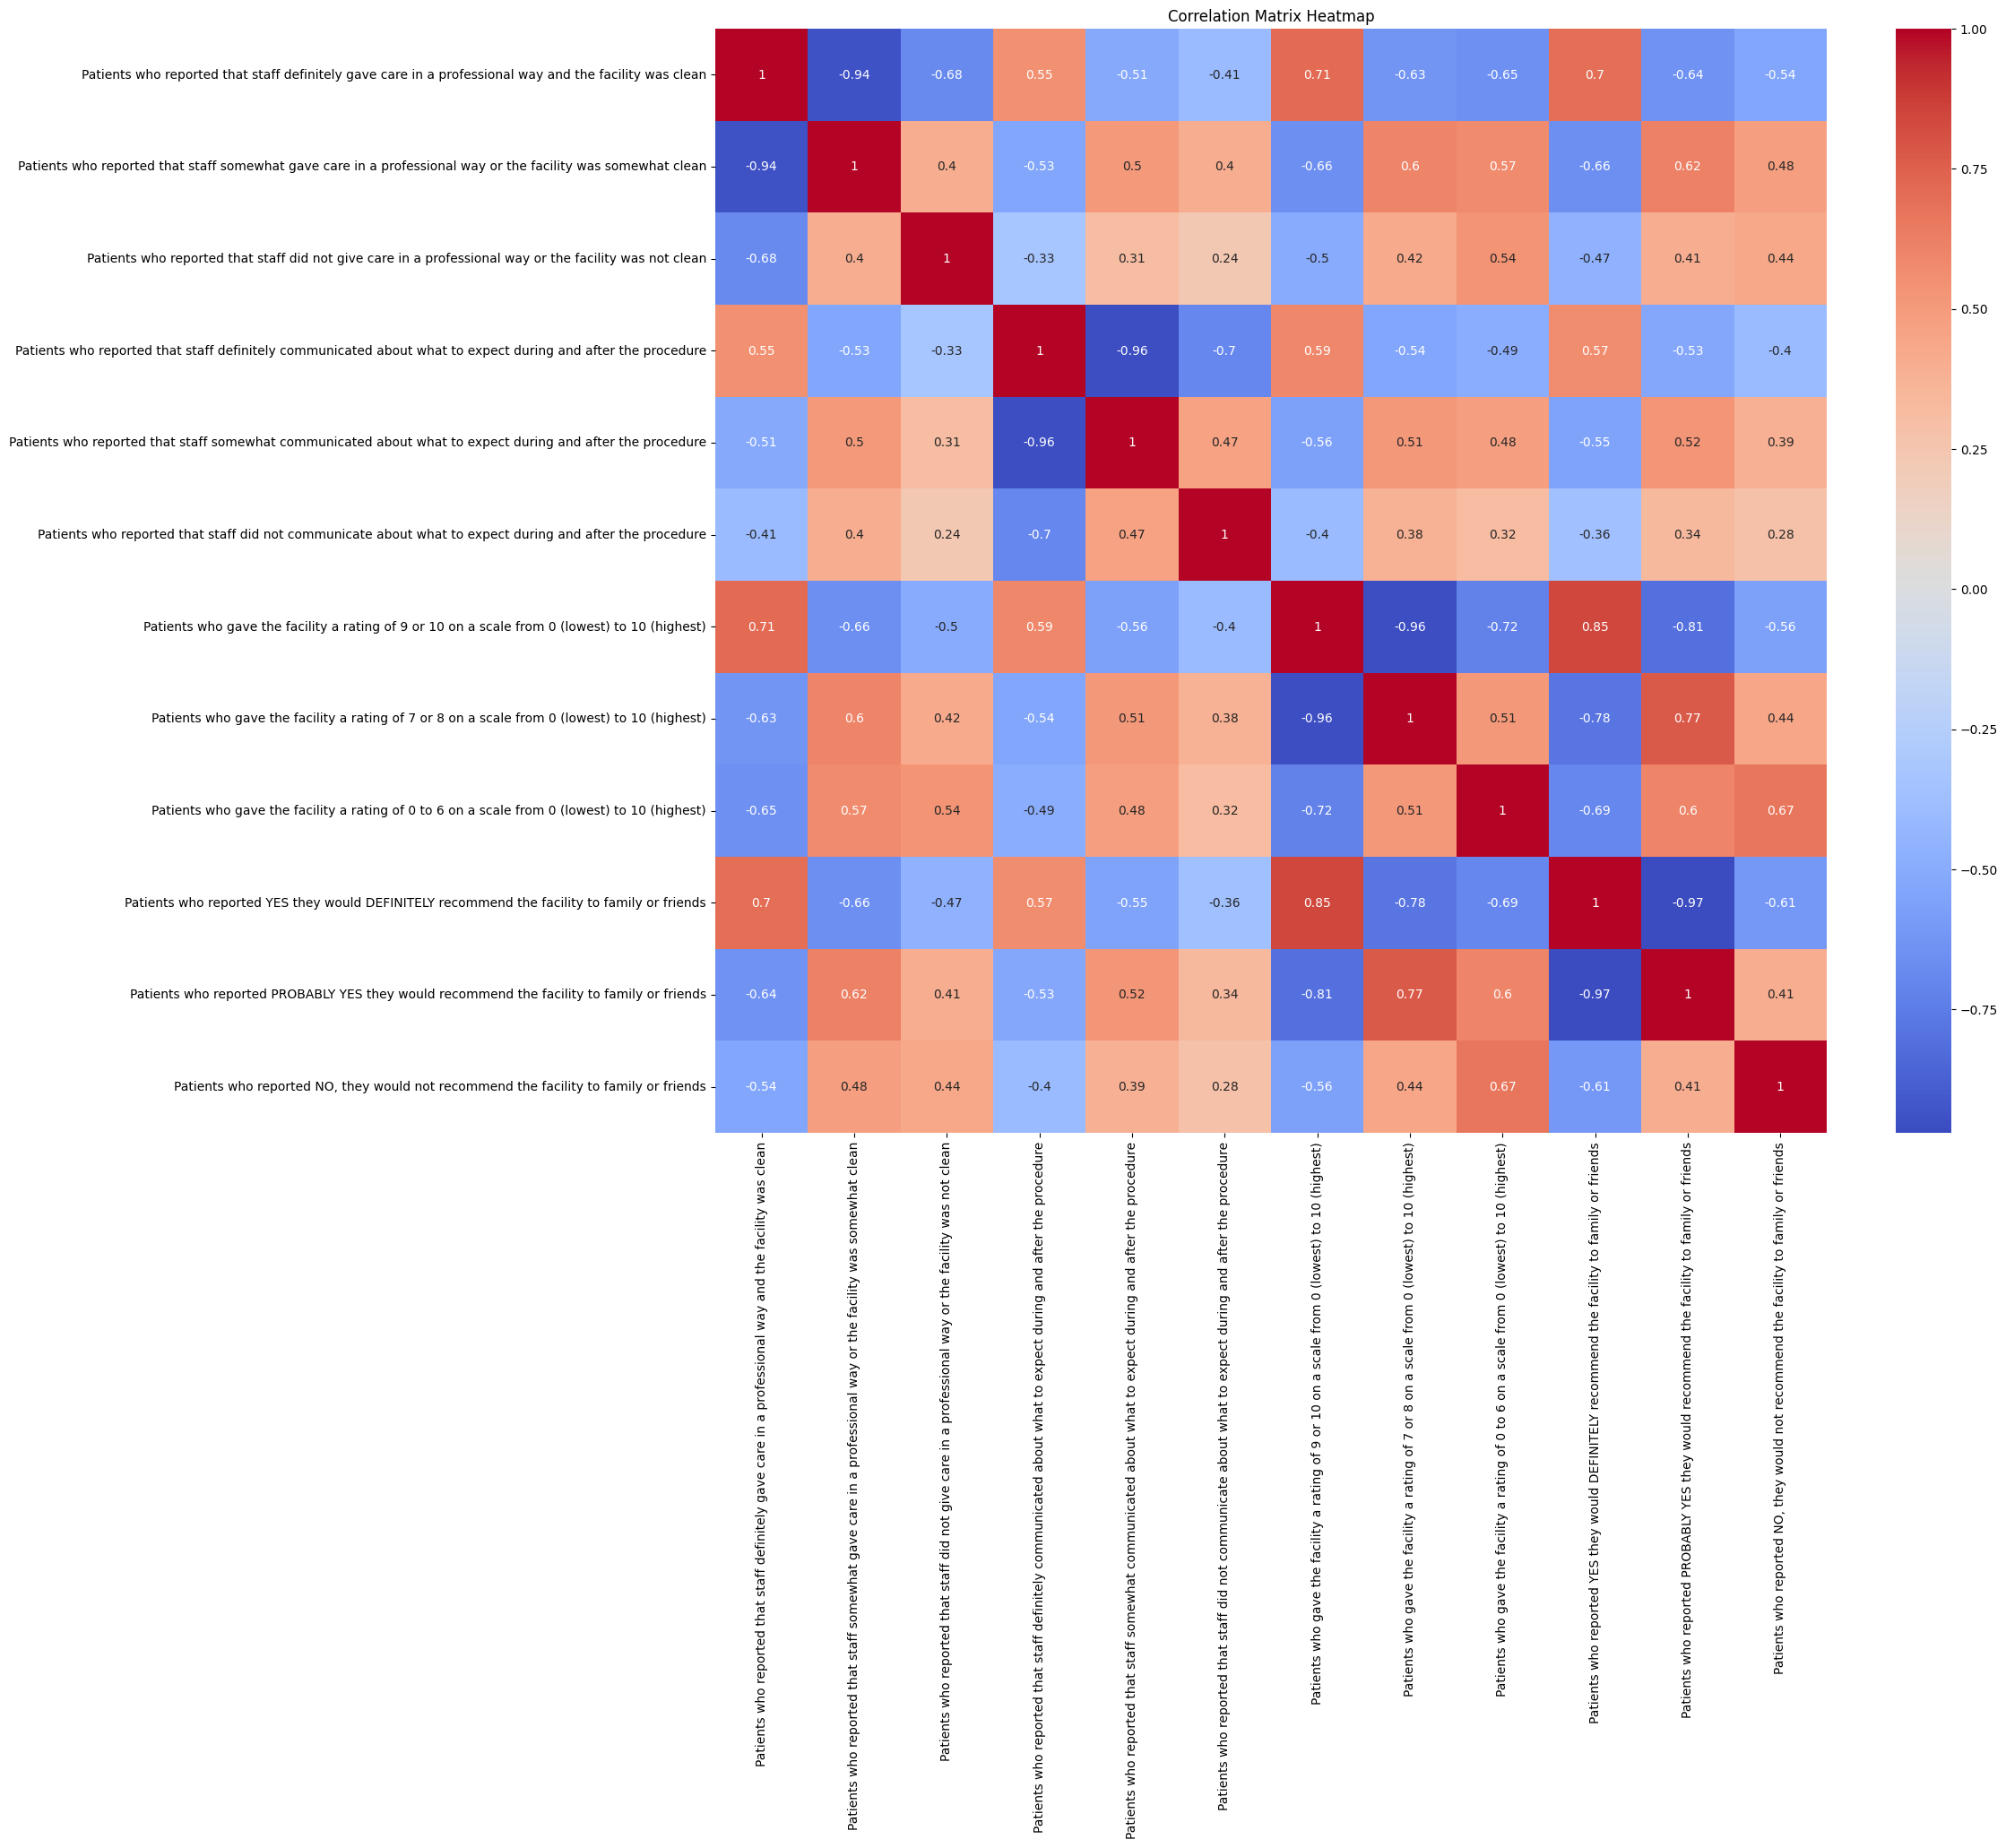

In [129]:
# Plot a heatmap of the correlation matrix using seaborn 
#import seaborn as sns

plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

## Train and Evaluate a Model 

In [133]:
# Split the data into features and labels
X2 = results_df.drop("Patients who reported NO, they would not recommend the facility to family or friends", axis=1)
y2 = results_df["Patients who reported NO, they would not recommend the facility to family or friends"]


In [134]:
# Split data with ratio: train: 0.8 | test: 0.2

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=13)

In [135]:
#create a linear regression onject to train and score
linear_model2 = LinearRegression()

In [136]:
# Train a linear regression model on the training set
linear_model2.fit(X2_train, y2_train)

LinearRegression()

In [147]:
# Make predictions on the training set
linear_predictions_train2 = linear_model2.predict(X2_train)

# Make predictions on the test set
linear_predictions_test2 = linear_model2.predict(X2_test)

print(linear_predictions_test2[:12].round(0))

[ 0.  0. -0. -1. -0.  0.  0. -0. -0. -1. -1.  0.]


In [149]:
# Compare the predictions with the actual values
print(y2_test[:12].values.round(0))

[ 0.  0.  0. -1.  0.  0.  0.  0.  0. -1. -1.  0.]


In [150]:
# Calculate the relative error of these predictions

relative_errors2 = np.abs(linear_predictions_test2 - y2_test) / y2_test * 100
print("Relative errors in percent: ", relative_errors2[:12].values)

Relative errors in percent:  [ 1.11339159e-12  9.30868382e-13  6.59036999e+02 -2.78794405e-14
  6.59036999e+02  1.22290552e-12  8.76111418e-13  6.59036999e+02
  6.59036999e+02 -1.67276643e-13 -8.36383215e-14  9.67373024e-13]


In [151]:
# Calculate the root mean squared error on the training and test set

# Training RMSE
rmse_train2 = root_mean_squared_error(y2_train, linear_predictions_train2)
print(f"Training RMSE: {rmse_train2}")

# Testing RMSE
rmse_test2 = root_mean_squared_error(y2_test, linear_predictions_test2)
print(f"Testing RMSE: {rmse_test2}")


Training RMSE: 1.7718841695292409e-15
Testing RMSE: 1.6377731123645516e-15


In [152]:
# Train a simple linear regression model with only one feature for comparison
X_train_low_rating = X2_train[['Patients who gave the facility a rating of 0 to 6 on a scale from 0 (lowest) to 10 (highest)']]
X_test_low_rating = X2_test[['Patients who gave the facility a rating of 0 to 6 on a scale from 0 (lowest) to 10 (highest)']]
simple_linear_model2 = LinearRegression()
simple_linear_model2.fit(X_train_low_rating, y2_train)


LinearRegression()

In [142]:
# Make predictions on the training and test set
simple_predictions_train2 = simple_linear_model2.predict(X_train_low_rating)
simple_predictions_test2 = simple_linear_model2.predict(X_test_low_rating)

In [143]:
# Calculate the root mean squared error on the training and test set
simple_rmse_train2 = root_mean_squared_error(y2_train, simple_predictions_train2)
print(f"Training Simple RMSE: {simple_rmse_train2}")

simple_rmse_test2 = root_mean_squared_error(y2_test, simple_predictions_test2)
print(f"Testing Simple RMSE: {simple_rmse_test2}")

Training Simple RMSE: 0.7451795197730151
Testing Simple RMSE: 0.7376328294061654


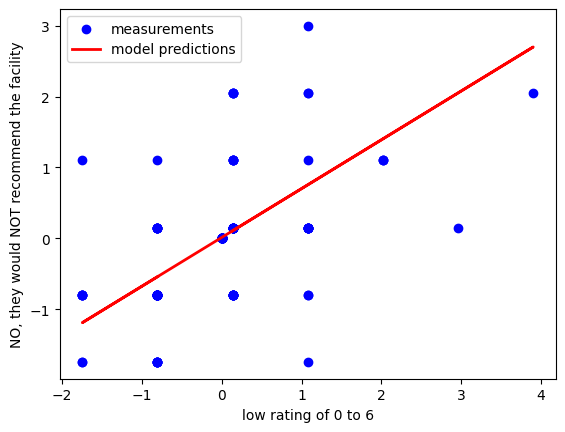

In [145]:
# Plot the simple linear regression model
plt.scatter(X_test_low_rating, y2_test, color='blue', label='measurements')
plt.plot(X_test_low_rating, simple_predictions_test2, color='red', linewidth=2, label='model predictions')
plt.xlabel("low rating of 0 to 6")
plt.ylabel("NO, they would NOT recommend the facility")
plt.legend(loc="upper left")
plt.show()